In [3]:
from scipy import stats
from scipy import integrate
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (9, 5.5)
rcParams['ytick.labelsize'],rcParams['xtick.labelsize'] = 17.,17.
rcParams['axes.labelsize']=19.
rcParams['legend.fontsize']=17.
rcParams['axes.titlesize']=20.
import seaborn as sb
sb.despine()
sb.set_style('white', {'xes.linewidth': 0.5, 'axes.edgecolor':'black'})
sb.despine(left=True)

<Figure size 648x396 with 0 Axes>

In [ ]:
stats.norm.p

In [121]:
Nmax=1000
NN=np.arange(1,Nmax,1)
def uprior(N): return np.ones(N.shape)/Nmax
def nprior(N,N0,sigma): return np.exp(-(N-N0)**2/(2*sigma**2))/np.sqrt(2.*np.pi *sigma**2 )
def plprior(N,a): return N**a
def lkh(N,D): return np.where(N<D,0,1/N)

In [122]:
def post(likehood,prior): return likehood*prior/np.sum(likehood*prior)

In [132]:
plprior(NN,-2.).sum()

1.6439335666815602

Mean of the Posteriror = 106.85


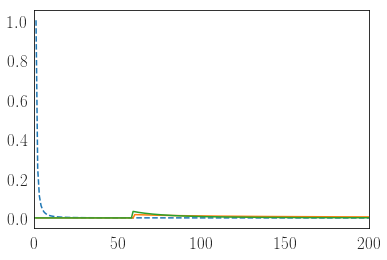

In [125]:
plt.plot(NN,plprior(NN,-2.),'--')
plt.plot(NN,lkh(NN,60))
plt.plot(post(lkh(NN,60),plprior(NN,-2.)))
plt.xlim(0,200)
print('Mean of the Posteriror = {:.2f}'.format(np.average(NN, weights=posterior)))

Mean of the Posterior = 112.32


(0, 0.1)

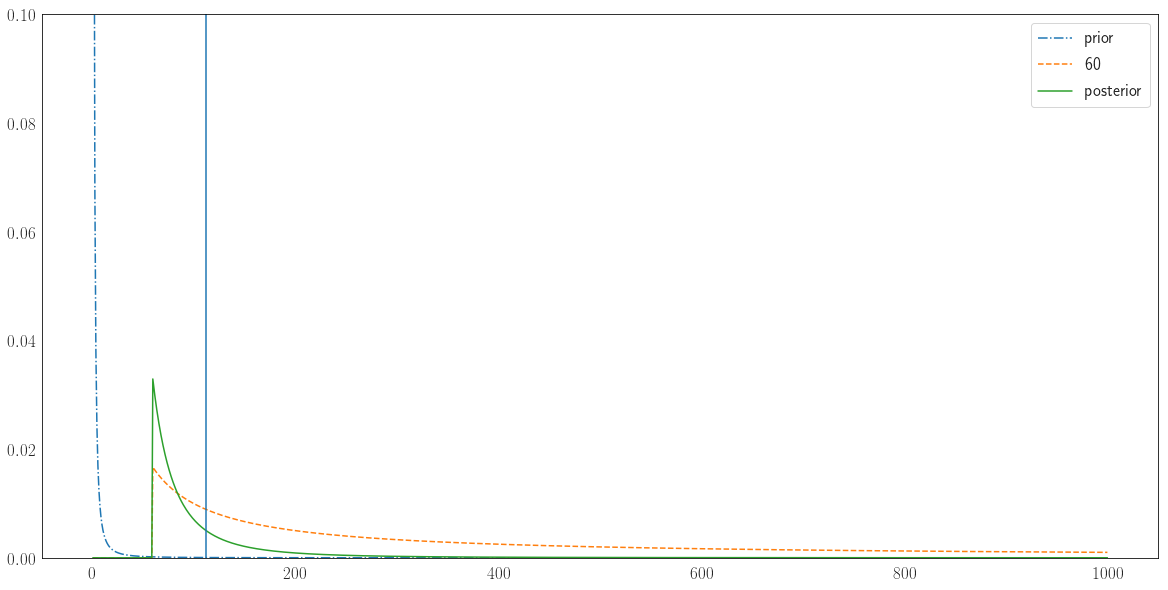

In [137]:
tanks=np.array([60])#,30,90,380])
prior=nprior(NN,100,50)
#prior=uprior(NN)
prior=plprior(NN,-2.)/np.sum(plprior(NN,-2.))
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(NN,prior,'-.',label='prior')
for tank in tanks:
    posterior=post(lkh(NN,tank),prior)
    prior=posterior
    ax.plot(NN,lkh(NN,tank),'--',label=tank)
ax.plot(NN,posterior,label='posterior')
plt.legend()
ax.axvline(np.average(NN, weights=posterior))
print('Mean of the Posterior = {:.2f}'.format(np.average(NN, weights=posterior)))
plt.ylim(0,0.1)

In [81]:
np.average(NN, weights=posterior)

515.396902239978

### The locomotive problem (analytical)
The prior distribution is:
\begin{align}
P(N)=\frac{1}{N_\text{max}} && (N=1,\cdots,N_\text{max})
\end{align}

where $N$ is the number of locomotives the railroad owns, and Nmax is the upper bound of the possible numbers.

If you observed a locomotive with the number $D$, the likelihood is:
$$
P(D∣N)=
\begin{cases}
\frac{1}{N} & (N\ge D) \\
0 & (N<D)
\end{cases}
$$
Then the posterior distribution becomes:
$$
P(N∣D) \propto P(D∣N)P(N)=
\begin{cases}
\frac{1}{NN_\text{max}} & (N\ge D)\\
0 & (N<D)
\end{cases}
$$

The normalization constant is:
$$
Z=\int \frac{1}{N_\text{max}} \frac{1}{N} =  
$$

Hence,

P(N∣D)=P(D∣N)P(N)Z∼{1logNmaxD×1N0(N≥D)(N<D)
Especially, when Nmax=1000,D=60,N=60,

P(N∣D)∼1log100060×160≒0.0059
This matches with the result of Figure 3-1.

As another case, if you observed three locomotives with the number D1,D2,D3(D1≤D2≤D3), the likelihood is:

P(D1,D2,D3∣N)={1N30(D3≤N)(D3>N)
Then the posterior distribution becomes:

P(N∣D1,D2,D3)∝P(D1,D2,D3∣N)P(N)={1N3Nmax0(D3≤N)(D3>N)
The normalization constant is:

Z=∑NmaxN=D31N3Nmax∼1Nmax∫NmaxD31x3dx
　=12Nmax(1D23−1N2max)=12NmaxN2max−D23N2maxD23
Hence,

P(N∣D1,D2,D3)=P(D1,D2,D3∣N)P(N)Z∼{2N2maxD23N2max−D23×1N30(N≥D3)(N<D3)
Now, the mean of the posterior is:

∑NmaxN=D3(N×2N2maxD23N2max−D231N3)∼2N2maxD23N2max−D23∫NmaxD31x2dx
　=2N2maxD23N2max−D23(1D3−1Nmax)=2NmaxD3Nmax+D3
Especially, when Nmax=500,1000,2000 and D3=90,

Nmax=500:2×500×90500+90≒152.5
Nmax=1000:2×1000×901000+90≒165.1
Nmax=2000:2×2000×902000+90≒172.2
This matches with the result in the book.

From this calculation, you can see that the posterior depends only on the largest number you observed.